In [2]:
import pandas as pd
import json
import bz2

# Generate the intersection

In [3]:
file_path = 'datasets/jsonl/dataset_train.jsonl'

# Initialize an empty list to store individual JSON records
data = []

# Read the JSONL file line by line and append each record to the list
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        record = json.loads(line.strip())
        data.append(record)

# Convert the list of JSON records to a DataFrame
train = pd.DataFrame(data)

train.shape
  

(1800, 12)

In [4]:
file_path = 'datasets/jsonl/dataset_val.jsonl'

# Initialize an empty list to store individual JSON records
data = []

# Read the JSONL file line by line and append each record to the list
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        record = json.loads(line.strip())
        data.append(record)

# Convert the list of JSON records to a DataFrame
test = pd.DataFrame(data)

test.shape

(200, 12)

In [5]:
file_path = 'datasets/jsonl/dataset_dev.jsonl'

# Initialize an empty list to store individual JSON records
data = []

# Read the JSONL file line by line and append each record to the list
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        record = json.loads(line.strip())
        data.append(record)

# Convert the list of JSON records to a DataFrame
dev = pd.DataFrame(data)

dev.shape

(200, 12)

In [6]:
important = ['text', 'meta', 'tokens', 'spans', 'domain_paragraph']

In [7]:
gold = pd.concat([train, test, dev])
gold = gold[important]
gold = gold[gold['domain_paragraph'] == 'Géographie']

In [8]:
gold.sample(10)['meta'].values[0]

{'volume': 1,
 'numero': 606,
 'head': 'ACHYR, ACHIAI',
 'paragraph': 1,
 'domain_article': 'Géographie',
 'domain_paragraph': 'Géographie',
 'author': 'Diderot'}

In [9]:
def get_key(meta):
    volume = str(meta['volume']).zfill(2)
    numero = meta['numero']
    return f'volume{volume}-{numero}'
gold['key']= gold.apply(lambda x: get_key(x['meta']), axis=1,)

In [11]:
gold

text  \
0    ILLESCAS, (Géog.) petite ville d'Espagne, dan...   
1    MULHAUSEN, (Géog.) ville impériale d'Allemagn...   
2    * ADDA, riviere de Suisse & d'Italie, qui a s...   
3    SINTRA ou CINTRA, (Géog. mod.) montagne de Po...   
4    * ACHSTEDE, ou AKSTEDE, s. petite Ville d'All...   
..                                                ...   
95   COLOCHINA, (Géog. mod.) ville de la Turquie e...   
96   La Hongrie asiatique, ou la grande Hongrie, é...   
97   CADALENS, ou CADELENS, (Géog.) ville de Franc...   
98   * ABEL, s. petite ville des Ammonites que Jos...   
99   * BETHUNE, (Géog.) ville de France au comté d...   

                                                 meta  \
0   {'volume': 8, 'numero': 2637, 'paragraph_id': ...   
1   {'volume': 10, 'numero': 3648, 'paragraph_id':...   
2   {'volume': 1, 'numero': 763, 'head': 'ADDA', '...   
3   {'volume': 15, 'numero': 1108, 'paragraph': 1,...   
4   {'volume': 1, 'numero': 603, 'head': 'ACHSTEDE...   
..                                                ...   
95  {'volume': 3, 'numero': 2988, 'paragraph_id': ...   
96  {'volume': 8, 'numero': 1405, 'paragraph': 1, ...   
97  {'volume': 2, 'numero': 4552, 'head': 'CADALEN...   
98  {'volume': 1, 'numero': 168, 'head': 'ABEL', '...   
99  {'volume': 2, 'numero': 1821, 'paragraph_id': ...   

                                               tokens  \
0   [{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...   
1   [{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...   
2   [{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...   
3   [{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...   
4   [{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...   
..                                                ...   
95  [{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...   
96  [{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...   
97  [{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...   
98  [{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...   
99  [{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...   

                                                spans domain_paragraph  \
0   [{'text': 'ILLESCAS', 'source': 'fr_pipeline',...       Géographie   
1   [{'text': 'MULHAUSEN', 'source': 'fr_pipeline'...       Géographie   
2   [{'start': 3, 'end': 7, 'token_start': 2, 'tok...       Géographie   
3   [{'start': 1, 'end': 17, 'token_start': 1, 'to...       Géographie   
4   [{'start': 3, 'end': 23, 'token_start': 2, 'to...       Géographie   
..                                                ...              ...   
95  [{'text': 'COLOCHINA', 'source': 'fr_pipeline'...       Géographie   
96  [{'start': 1, 'end': 21, 'text': 'La Hongrie a...       Géographie   
97  [{'start': 1, 'end': 22, 'token_start': 1, 'to...       Géographie   
98  [{'start': 3, 'end': 7, 'token_start': 2, 'tok...       Géographie   
99  [{'start': 3, 'end': 10, 'token_start': 2, 'to...       Géographie   

              key  
0   volume08-2637  
1   volume10-3648  
2    volume01-763  
3   volume15-1108  
4    volume01-603  
..            ...  
95  volume03-2988  
96  volume08-1405  
97  volume02-4552  
98   volume01-168  
99  volume02-1821  

[1096 rows x 6 columns]

In [12]:
VILLESFR = pd.read_json('/home/antoine/Documents/GitHub/toponym-disambiguation/VILLESFR/with_moredatas_826frenchcities_100124.json')

<Axes: >

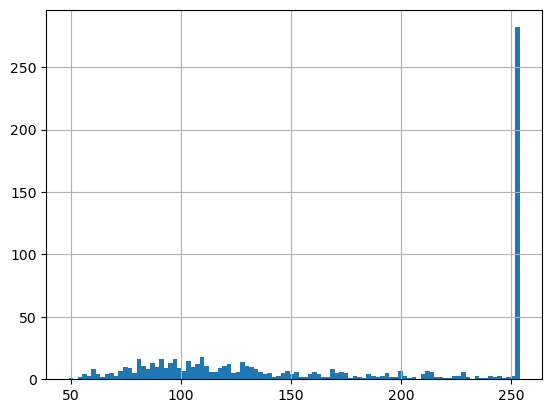

In [15]:
VILLESFR['content'].apply(lambda x: len(x)).hist(bins=100)

In [20]:
#common rows of gold and VILLESFR
common = pd.merge(gold, VILLESFR, on='key')
common

text  \
0    * BERRE, (Géog.) petite ville de France, en P...   
1    VAREMBON ou VARAMBON, (Géog. mod.) petite  vi...   
2    * AGRERE (Géog.) petite ville de France dans ...   
3    Chateau-Vilain, (Géog.) petite ville de Franc...   
4    CASTELNAUDARY, (Géog.) ville considérable  de...   
..                                                ...   
91   NEUFCHATEL en Bray, (Géog.) petite ville de F...   
92   CLERVAL, (Géog. mod.) petite ville de France ...   
93   * AGDE, (Géog.) ville de France en Languedoc,...   
94   CADALENS, ou CADELENS, (Géog.) ville de Franc...   
95   * BETHUNE, (Géog.) ville de France au comté d...   

                                                 meta  \
0   {'volume': 2, 'numero': 1768, 'paragraph_id': ...   
1   {'volume': 16, 'numero': 4447, 'paragraph_id':...   
2   {'volume': 1, 'numero': 1210, 'head': 'AGRERE'...   
3   {'volume': 3, 'numero': 1129, 'paragraph_id': ...   
4   {'volume': 2, 'numero': 6040, 'paragraph_id': ...   
..                                                ...   
91  {'volume': 11, 'numero': 635, 'paragraph_id': ...   
92  {'volume': 3, 'numero': 2393, 'paragraph': 1, ...   
93  {'volume': 1, 'numero': 1087, 'head': 'AGDE', ...   
94  {'volume': 2, 'numero': 4552, 'head': 'CADALEN...   
95  {'volume': 2, 'numero': 1821, 'paragraph_id': ...   

                                               tokens  \
0   [{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...   
1   [{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...   
2   [{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...   
3   [{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...   
4   [{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...   
..                                                ...   
91  [{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...   
92  [{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...   
93  [{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...   
94  [{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...   
95  [{'text': ' ', 'start': 0, 'end': 1, 'id': 0, ...   

                                                spans domain_paragraph  \
0   [{'text': 'BERRE', 'source': 'fr_pipeline', 'i...       Géographie   
1   [{'text': 'VAREMBON ou VARAMBON', 'source': 'f...       Géographie   
2   [{'start': 3, 'end': 9, 'token_start': 2, 'tok...       Géographie   
3   [{'text': 'Chateau-Vilain', 'source': 'fr_pipe...       Géographie   
4   [{'text': 'CASTELNAUDARY', 'source': 'fr_pipel...       Géographie   
..                                                ...              ...   
91  [{'text': 'NEUFCHATEL en Bray', 'source': 'fr_...       Géographie   
92  [{'start': 1, 'end': 8, 'token_start': 1, 'tok...       Géographie   
93  [{'start': 3, 'end': 7, 'token_start': 2, 'tok...       Géographie   
94  [{'start': 1, 'end': 22, 'token_start': 1, 'to...       Géographie   
95  [{'start': 3, 'end': 10, 'token_start': 2, 'to...       Géographie   

              key                   head  \
0   volume02-1768                  BERRE   
1   volume16-4447   VAREMBON ou VARAMBON   
2   volume01-1210                 AGRERE   
3   volume03-1129         Chateau-Vilain   
4   volume02-6040          CASTELNAUDARY   
..            ...                    ...   
91   volume11-635     NEUFCHATEL en Bray   
92  volume03-2393                CLERVAL   
93  volume01-1087                   AGDE   
94  volume02-4552  CADALENS, ou CADELENS   
95  volume02-1821                BETHUNE   

                                              content             head_root  \
0   \n* BERRE, (Géog.) petite ville de France, en ...               [berre]   
1   \nVAREMBON ou VARAMBON, (Géog. mod.) petite \n...  [varembon, varambon]   
2   \n* AGRERE (Géog.) petite ville de France dans...              [agrere]   
3   \nChateau-Vilain, (Géog.) petite ville de Fran...      [chateau-vilain]   
4   \nCASTELNAUDARY, (Géog.) ville considérable \n...       [castelnaudary]   
..                                                ...                   ...   
91  \nNEUFCHATEL en Bra

In [27]:
#delete duplicated rows on common['truthyV_JSON'] :
common = common.drop_duplicates(subset='truthyV_JSON')
common.shape



(95, 28)

In [28]:
prefix = '/home/antoine/Documents/GitHub/datas/'
json_name = 'small-wiki.json'
json_list = common['truthyV_JSON'].tolist()

# Save the list of JSON objects to a file
with open(prefix+json_name, 'w') as json_file:
    json.dump(json_list, json_file)

In [29]:
import bz2
bz2_output = 'small-wiki.json.bz2'
with open(prefix+json_name, 'rb') as f_in :
    with bz2.open(prefix+bz2_output, 'wb') as f_out:
        f_out.writelines(f_in)


# Dump and compress bz2 like a Wikidata dump

In [30]:
prefix = '/home/antoine/Documents/GitHub/datas/'
json_name = 'small-wiki.json'
# read the json file
with open(prefix+json_name, 'r') as f:
    data = json.load(f)

In [31]:
with bz2.open(prefix+"small.json.bz2", "wt") as f:
    for entity in data:
        # Write each entity as a separate line in the JSON file
        json.dump(entity, f)
        f.write('\n')

print("Sample JSON.bz2 file created successfully.")

Sample JSON.bz2 file created successfully.


In [49]:
# Open the JSON.bz2 file for reading
with bz2.open(prefix+"small.json.bz2", "rt") as f:
    # Read each line in the file
    for line in f:
        # Parse the JSON object from the line
        entity = json.loads(line)
        
        # Process the entity
        print(entity)

{'pageid': 305400, 'ns': 0, 'title': 'Q317809', 'lastrevid': 2040044779, 'modified': '2023-12-29T18:25:14Z', 'type': 'item', 'id': 'Q317809', 'labels': {'zh-hans': {'language': 'zh-hans', 'value': '贝尔莱唐'}, 'zh-hant': {'language': 'zh-hant', 'value': '貝爾萊唐'}, 'zh-hk': {'language': 'zh-hk', 'value': '貝爾萊唐'}, 'zh-cn': {'language': 'zh-cn', 'value': '贝尔莱唐'}, 'zh-sg': {'language': 'zh-sg', 'value': '贝尔莱唐'}, 'zh-tw': {'language': 'zh-tw', 'value': '貝爾萊唐'}, 'pms': {'language': 'pms', 'value': "Berre-l'Étang"}, 'pam': {'language': 'pam', 'value': "Berre-l'Étang"}, 'pl': {'language': 'pl', 'value': "Berre-l'Étang"}, 'eu': {'language': 'eu', 'value': "Berre-l'Étang"}, 'fr': {'language': 'fr', 'value': "Berre-l'Étang"}, 'es': {'language': 'es', 'value': "Berre-l'Étang"}, 'vo': {'language': 'vo', 'value': "Berre-l'Étang"}, 'oc': {'language': 'oc', 'value': 'Bèrra'}, 'ms': {'language': 'ms', 'value': "Berre-l'Étang"}, 'ceb': {'language': 'ceb', 'value': "Berre-l'Étang"}, 'it': {'language': 'it', 'v

# Masks

In [16]:
VILLESFR.columns

Index(['key', 'head', 'content', 'head_root', 'SAINT', 'NP', 'pruned_NP',
       'cand_Results', 'bestCand', 'matchs', 'feedback', 'truthyV', 'Comment1',
       'Comment2', 'truthyV_coords', 'bestCand_coords', 'ACC@50km',
       'truthyV_JSON', 'truthyV_spellings', 'truthyV_population',
       'fullcontent', 'distance_paris', 'toponymic_density'],
      dtype='object')

In [31]:

# Define the replacement function
def replace_tokens(row):
    masked_content = row['content'].lower()
    head = row['head'].lower()
    pruned_NP = [NP.lower() for NP in row['pruned_NP']]
    
    # Loop through tokens in the content
    for token in masked_content.split():
        # Check if the token is neither in head nor in pruned_NP
        if token not in head and token not in pruned_NP:
            # Replace the token with %
            masked_content = masked_content.replace(token, '%')
    
    return masked_content

# Sample one row from VILLESFR
sample = VILLESFR.sample(1)

# Apply the replacement function to create 'masked_content'
sample['masked_content'] = sample.apply(replace_tokens, axis=1)

In [34]:
print(sample['content'].values[0])

print(sample['head'].values[0]   + ' ' + str(sample['pruned_NP'].values[0]))

print(sample['masked_content'].values[0])


MEZERAY, (Géog.) village de France dans la
basse Normandie, entre Argentan & Falaise. Il n'est
connu, & nous n'en parlons ici, que parce qu'il
a donné le jour à François Eudes de Mezeray, qui
s'est fait un grand nom par son histoire de France. Il
publia
MEZERAY ['france', 'normandie', 'argentan', 'falaise']

% % % % france % %
% % % argentan % fa%ise. % %
% % % % % % % % qu'%
a % % % % % eu%s % % %
% % % % % % % % % % %
%
